# Python 與資料分析

- NumPy
- pandas
- matplotlib.pyplot
- 網頁爬蟲（如果有時間的話）

## NumPy

[NumPy 文件](https://docs.scipy.org/doc/numpy/reference/index.html#reference)

如何安裝

```sh
pip install numpy # 在終端機
```

In [0]:
!pip install numpy 

如何載入

```python
import numpy as np
```

In [0]:
import numpy as np

print(np.__version__)

1.14.3


### NumPy 的第一個特性

可以進行 element-wise operation

In [0]:
\km_mile_ratio = 0.62137
km_list = [3, 5, 10, 21.095, 42.195]
# 土法煉鋼
mile_list = [3*km_mile_ratio, 5*km_mile_ratio, 10*km_mile_ratio, 21.095*km_mile_ratio, 42.195*km_mile_ratio]
mile_list

[1.86411, 3.1068499999999997, 6.213699999999999, 13.10780015, 26.21870715]

In [0]:
# 解法 1：迴圈
mile_list = []
for km in km_list:
  mile_list.append(km * km_mile_ratio)
mile_list

[1.86411, 3.1068499999999997, 6.213699999999999, 13.10780015, 26.21870715]

In [0]:
# 解法 2：list comprehension
mile_list = [km * km_mile_ratio for km in km_list]
mile_list

[1.86411, 3.1068499999999997, 6.213699999999999, 13.10780015, 26.21870715]

In [0]:
# 解法 3：map() + lambda expression
list(map(lambda km: km_mile_ratio * km, km_list))

[1.86411, 3.1068499999999997, 6.213699999999999, 13.10780015, 26.21870715]

In [0]:
# 解法 4：NumPy ndarray
km_arr = np.array(km_list)
km_arr * km_mile_ratio

array([ 1.86411   ,  3.10685   ,  6.2137    , 13.10780015, 26.21870715])

In [0]:
km_list * km_mile_ratio

TypeError: ignored

In [0]:
km_list * 2

[3, 5, 10, 21.095, 42.195, 3, 5, 10, 21.095, 42.195]

### NumPy 的第二個特性

只能容納單一種型別

In [0]:
my_list = [87, 8.7, True, "Luke Skywalker"]
for i in my_list:
  print(type(i))

<class 'int'>
<class 'float'>
<class 'bool'>
<class 'str'>


In [0]:
my_arr = np.array(my_list)
for i in my_arr:
  print(type(i))

<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>


### NumPy 的第三個特性

選擇元素 slice 的索引值時候可以不規則

In [0]:
km_arr[[0, 1, -1]]

array([ 3.   ,  5.   , 42.195])

### NumPy 的第四個特性

利用判斷條件去選擇元素

In [0]:
km_arr[km_arr > 5]

array([10.   , 21.095, 42.195])

In [0]:
km_arr[(km_arr > 10) | (km_arr < 5)]

NameError: ignored

In [0]:
km_arr > 10

array([False, False, False,  True,  True])

In [0]:
km_arr < 5

array([ True, False, False, False, False])

In [0]:
(km_arr > 10) | (km_arr < 5)

array([ True, False, False,  True,  True])

### 如何創造 ndarray

- `np.array()`：輸入一個 list or tuple
- `np.arange(start, stop, step)`：產生一組數列
- `np.linspace(start, stop, num)`：產生一組數列
- `np.eye()`： 產生單位矩陣
- `np.ones()`：初始化一個陣列
- `np.zeros()`：初始化一個陣列
- `np.random.randint(start, stop, size)`：產生隨意整數

In [0]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [0]:
np.arange(10)

In [0]:
np.linspace(1, 10, num=20)

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

In [0]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [0]:
np.random.randint(1, 10, 5)

array([4, 7, 5, 1, 5])

### ndarray 常用的屬性與方法

- `.size`
- `.shape`
- `.dtype`
- `.astype()`
- `.reshape()`

In [0]:
print(km_arr.size)
len(km_arr)

5


5

In [0]:
km_arr.shape

(5,)

In [0]:
km_arr.reshape(5, 1)

array([[ 3.   ],
       [ 5.   ],
       [10.   ],
       [21.095],
       [42.195]])

In [0]:
km_arr.dtype

dtype('float64')

In [0]:
km_arr.astype('float32').dtype

dtype('float32')

In [0]:
my_arr = np.array(['True', 'False'])
my_arr.dtype

dtype('<U5')

In [0]:
my_tensor = np.arange(36).reshape(2, 3, 2, 3)
my_tensor

array([[[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]]],


       [[[18, 19, 20],
         [21, 22, 23]],

        [[24, 25, 26],
         [27, 28, 29]],

        [[30, 31, 32],
         [33, 34, 35]]]])

## pandas

- 應用：
  - 帶來 DataFrame 這個資料結構
  - 可以用來讀取外部資料
  - 可以用來作圖
- 如何安裝

```python
pip install pandas
```

In [0]:
!pip install pandas

- 如何載入

```python
import pandas as pd
```

In [0]:
import pandas as pd

print(pd.__version__)

0.22.0


### pandas 的起源

<https://github.com/pandas-dev/pandas>

> Flexible and powerful data analysis / manipulation library for Python, providing labeled data structures similar to R data.frame objects, statistical functions, and much more.

- **pan**el
- **da**ta
- analysi**s**

### pandas 提供的資料容器

- `Series`
- `DataFrame`
- `Panel`

### 建立 Series

In [0]:
favorite_players = {
    "PG": ","Steve Nash
    "SG": "Paul Pierce",
    "SF": "Scottie Pippen",
    "PF": "Kevin Garnett",
    "C": "Tim Duncan"
}
print(type(favorite_players))
favorite_players

<class 'dict'>


{'C': 'Tim Duncan',
 'PF': 'Kevin Garnett',
 'PG': 'Steve Nash',
 'SF': 'Scottie Pippen',
 'SG': 'Paul Pierce'}

In [0]:
ser = pd.Series(favorite_players)
type(ser)

In [0]:
ser[0]

'Tim Duncan'

In [0]:
ser['C']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

'Tim Duncan'

In [0]:
ser[:'SF']

C         Tim Duncan
PF     Kevin Garnett
PG        Steve Nash
SF    Scottie Pippen
dtype: object

In [0]:
ser[:4]

C         Tim Duncan
PF     Kevin Garnett
PG        Steve Nash
SF    Scottie Pippen
dtype: object

In [0]:
ser[['C', 'SF', 'SG']]

C         Tim Duncan
SF    Scottie Pippen
SG       Paul Pierce
dtype: object

In [0]:
ser[[0, 3, 4]]

C         Tim Duncan
SF    Scottie Pippen
SG       Paul Pierce
dtype: object

In [0]:
type(ser)

pandas.core.series.Series

In [0]:
ser.values

array(['Tim Duncan', 'Kevin Garnett', 'Steve Nash', 'Scottie Pippen',
       'Paul Pierce'], dtype=object)

In [0]:
ser.index

Index(['C', 'PF', 'PG', 'SF', 'SG'], dtype='object')

In [0]:
favorite_players = ["Steve Nash", "Paul Pierce", "Scottie Pippen", "Kevin Garnett", "Tim Duncan"]
ser = pd.Series(favorite_players, index=['PG', 'SG', 'SF', 'PF', 'C'])
ser

PG        Steve Nash
SG       Paul Pierce
SF    Scottie Pippen
PF     Kevin Garnett
C         Tim Duncan
dtype: object

In [0]:
ser = pd.Series(favorite_players)
ser

0        Steve Nash
1       Paul Pierce
2    Scottie Pippen
3     Kevin Garnett
4        Tim Duncan
dtype: object

In [0]:
indice_to_select = [0, 3, 4]
ser[indice_to_select]

0       Steve Nash
3    Kevin Garnett
4       Tim Duncan
dtype: object

### 建立 DataFrame

In [0]:
favorite_players = ["Steve Nash", "Paul Pierce", "Scottie Pippen", "Kevin Garnett", "Tim Duncan"]
numbers = [13, 34, 33, 21, 21]
players_dict = {
    "name": favorite_players,
    "number": numbers
}
df = pd.DataFrame(players_dict, columns = ['number', "name"])
df

,number,name
0,13,Steve Nash
1,34,Paul Pierce
2,33,Scottie Pippen
3,21,Kevin Garnett
4,21,Tim Duncan


In [0]:
df.columns = ['NUMBER', 'PLAYER'] 
df

,NUMBER,PLAYER
0,13,Steve Nash
1,34,Paul Pierce
2,33,Scottie Pippen
3,21,Kevin Garnett
4,21,Tim Duncan


### pandas DataFrame 解構

- DataFrame
  - 多個 Series
    - index + ndarray
      - 多個 scalar（變數）

In [0]:
df

,number,name
0,13,Steve Nash
1,34,Paul Pierce
2,33,Scottie Pippen
3,21,Kevin Garnett
4,21,Tim Duncan


In [0]:
type(df["number"])

pandas.core.series.Series

In [0]:
df.dtypes

number     int64
name      object
dtype: object

In [0]:
import numpy as np

arr = np.array([
    [13, "Steve Nash"],
    [34, "Paul Pierce"],
    [33, "Scottie Pippen"],
    [21, "Kevin Garnett"],
    [21, "Tim Duncan"]
])
arr.dtype

dtype('<U21')

In [0]:
df = pd.DataFrame(arr, columns=['number', 'player'])
df

,number,player
0,13,Steve Nash
1,34,Paul Pierce
2,33,Scottie Pippen
3,21,Kevin Garnett
4,21,Tim Duncan


In [0]:
df.dtypes

number    object
player    object
dtype: object

### 基本的 DataFrame Operation

1. select
2. filter
3. mutate
4. arrange
5. summarize
6. groupby

#### 從 DataFrame 中選擇元素

- 選變數（選欄位）
  - df["col"]
  - df.col
- 選觀測值（選列）
  - df.loc[]
  - df.iloc[]
  - 給判斷條件

In [0]:
df["NUMBER"]

0     0
1    34
2    33
3    21
4    21
Name: NUMBER, dtype: int64

In [0]:
df["PLAYER"]

0        Steve Nash
1       Paul Pierce
2    Scottie Pippen
3     Kevin Garnett
4        Tim Duncan
Name: PLAYER, dtype: object

In [0]:
df.NUMBER

0     0
1    34
2    33
3    21
4    21
Name: NUMBER, dtype: int64

In [0]:
df.PLAYER

0        Steve Nash
1       Paul Pierce
2    Scottie Pippen
3     Kevin Garnett
4        Tim Duncan
Name: PLAYER, dtype: object

In [0]:
df.loc[[0, 2, 3], :]

,NUMBER,PLAYER
0,0,Steve Nash
2,33,Scottie Pippen
3,21,Kevin Garnett


In [0]:
is_21 = df["NUMBER"] == 21

In [0]:
df[is_21]

,NUMBER,PLAYER
3,21,Kevin Garnett
4,21,Tim Duncan


In [0]:
favorite_players = ["Steve Nash", "Paul Pierce", "Scottie Pippen", "Kevin Garnett", "Tim Duncan"]
numbers = [13, 34, 33, 21, 21]
players_dict = {
    "name": favorite_players,
    "number": numbers
}
df = pd.DataFrame(players_dict, columns = ['number', "name"], 
                 index = [3, 4, 0, 1, 2])
df

,number,name
3,13,Steve Nash
4,34,Paul Pierce
0,33,Scottie Pippen
1,21,Kevin Garnett
2,21,Tim Duncan


In [0]:
df.loc[[0, 1, 2], "name"]

0    Scottie Pippen
1     Kevin Garnett
2        Tim Duncan
Name: name, dtype: object

In [0]:
df.iloc[[0, 1, 2], 1]

3        Steve Nash
4       Paul Pierce
0    Scottie Pippen
Name: name, dtype: object

In [0]:
favorite_players = ["Steve Nash", "Paul Pierce", "Scottie Pippen", "Kevin Garnett", "Tim Duncan"]
numbers = [13, 34, 33, 21, 21]
rings = [0, 1, 6, 1, 5]
players_dict = {
    "name": favorite_players,
    "number": numbers,
    "ring": rings
}
df = pd.DataFrame(players_dict, columns = ['number', "name", "ring"])
df

,number,name,ring
0,13,Steve Nash,0
1,34,Paul Pierce,1
2,33,Scottie Pippen,6
3,21,Kevin Garnett,1
4,21,Tim Duncan,5


In [0]:
# 選出冠軍戒指比 4 個多，比 1 個少的觀測值
# 兩種方式選：
## iloc, loc
df.loc[[0, 2, 4], :]

,number,name,ring
0,13,Steve Nash,0
2,33,Scottie Pippen,6
4,21,Tim Duncan,5


In [0]:
## 判斷條件
ring_filter = (df["ring"] > 4) | (df["ring"] < 1)
df[ring_filter]

,number,name,ring
0,13,Steve Nash,0
2,33,Scottie Pippen,6
4,21,Tim Duncan,5


In [0]:
df[(df["ring"] > 4) | (df["ring"] < 1)]

,number,name,ring
0,13,Steve Nash,0
2,33,Scottie Pippen,6
4,21,Tim Duncan,5


In [0]:
df

,number,name,ring
0,13,Steve Nash,0
1,34,Paul Pierce,1
2,33,Scottie Pippen,6
3,21,Kevin Garnett,1
4,21,Tim Duncan,5


In [0]:
df.loc[3, 'number'] = 5

In [0]:
df

,number,name,ring
0,13,Steve Nash,0
1,34,Paul Pierce,1
2,33,Scottie Pippen,6
3,5,Kevin Garnett,1
4,21,Tim Duncan,5


In [0]:
True & False

False

In [0]:
True and False

False

In [0]:
True | False

True

In [0]:
True or False

True

In [0]:
arr_1 = df["ring"].values > 4
arr_2 = df["ring"].values < 1
print(arr_1)
print(arr_2)

[False False  True False  True]
[ True False False False False]


In [0]:
df[np.logical_or(arr_1, arr_2)].loc[:, ["name", "ring"]]

,name,ring
0,Steve Nash,0
2,Scottie Pippen,6
4,Tim Duncan,5


In [0]:
df[np.logical_or(arr_1, arr_2)][["name", "ring"]]

,name,ring
0,Steve Nash,0
2,Scottie Pippen,6
4,Tim Duncan,5


#### 新增一個衍生變數

**mutate**

In [0]:
df["meaningless"] = df["number"] + df["ring"]
df

,number,name,ring,meaningless
0,13,Steve Nash,0,13
1,34,Paul Pierce,1,35
2,33,Scottie Pippen,6,39
3,5,Kevin Garnett,1,6
4,21,Tim Duncan,5,26


In [0]:
"Steve Nash".upper()

'STEVE NASH'

In [0]:
df["NAME"] = df["name"].map(lambda x: x.upper())
df

,number,name,ring,meaningless,NAME
0,13,Steve Nash,0,13,STEVE NASH
1,34,Paul Pierce,1,35,PAUL PIERCE
2,33,Scottie Pippen,6,39,SCOTTIE PIPPEN
3,5,Kevin Garnett,1,6,KEVIN GARNETT
4,21,Tim Duncan,5,26,TIM DUNCAN


In [0]:
df["NAME"] = df["name"].str.upper()
df

,number,name,ring,meaningless,NAME
0,13,Steve Nash,0,13,STEVE NASH
1,34,Paul Pierce,1,35,PAUL PIERCE
2,33,Scottie Pippen,6,39,SCOTTIE PIPPEN
3,5,Kevin Garnett,1,6,KEVIN GARNETT
4,21,Tim Duncan,5,26,TIM DUNCAN


In [0]:
upper_names = []
nrow = df.shape[0]
for i in range(nrow):
  upper_names.append(df.loc[i, "name"].upper())
df["upper_names"] = upper_names
df

,number,name,ring,meaningless,NAME,upper_names
0,13,Steve Nash,0,13,STEVE NASH,STEVE NASH
1,34,Paul Pierce,1,35,PAUL PIERCE,PAUL PIERCE
2,33,Scottie Pippen,6,39,SCOTTIE PIPPEN,SCOTTIE PIPPEN
3,5,Kevin Garnett,1,6,KEVIN GARNETT,KEVIN GARNETT
4,21,Tim Duncan,5,26,TIM DUNCAN,TIM DUNCAN


In [0]:
df.shape

(5, 6)

In [0]:
import pandas as pd

df = pd.DataFrame()
df["number"] = [13, 34, 21, 21, 34]
df["player"] = ["Steve Nash", "Paul Pierce", "Kevin Garnett", "Tim Duncan", "Shaquille O'Neal"]
df

,number,player
0,13,Steve Nash
1,34,Paul Pierce
2,21,Kevin Garnett
3,21,Tim Duncan
4,34,Shaquille O'Neal


#### 依據變數排序

- arrange: sort, order by
- `df.sort_values()`

In [0]:
df.sort_values(by="number")

,number,player
0,13,Steve Nash
2,21,Kevin Garnett
3,21,Tim Duncan
1,34,Paul Pierce
4,34,Shaquille O'Neal


In [0]:
df.sort_values(by="number", ascending=False)

,number,player
1,34,Paul Pierce
4,34,Shaquille O'Neal
2,21,Kevin Garnett
3,21,Tim Duncan
0,13,Steve Nash


In [0]:
df.sort_values(by="player")

,number,player
2,21,Kevin Garnett
1,34,Paul Pierce
4,34,Shaquille O'Neal
0,13,Steve Nash
3,21,Tim Duncan


In [0]:
df.sort_values(by="player", ascending=False)

,number,player
3,21,Tim Duncan
0,13,Steve Nash
4,34,Shaquille O'Neal
1,34,Paul Pierce
2,21,Kevin Garnett


In [0]:
df.sort_index()

,number,player
0,13,Steve Nash
1,34,Paul Pierce
2,21,Kevin Garnett
3,21,Tim Duncan
4,34,Shaquille O'Neal


In [0]:
df.sort_values(by=["number", "player"])

,number,player
0,13,Steve Nash
2,21,Kevin Garnett
3,21,Tim Duncan
1,34,Paul Pierce
4,34,Shaquille O'Neal


In [0]:
print(df.shape)
nrow = df.shape[0]
df_index = range(nrow)
df = df.sort_values(by=["number", "player"])
df.index = df_index
df

(5, 2)


,number,player
0,13,Steve Nash
1,21,Kevin Garnett
2,21,Tim Duncan
3,34,Paul Pierce
4,34,Shaquille O'Neal


In [0]:
df.sort_values(by=["number", "player"]).reset_index(drop=True)

,number,player
0,13,Steve Nash
1,21,Kevin Garnett
2,21,Tim Duncan
3,34,Paul Pierce
4,34,Shaquille O'Neal


#### 摘要資料框

In [0]:
df.describe()

,number
count,5.000000
mean,24.600000
std,9.181503
min,13.000000
25%,21.000000
50%,21.000000
75%,34.000000
max,34.000000


In [0]:
csv_file = "https://storage.googleapis.com/learn_pd_like_tidyverse/gapminder.csv"
gapminder = pd.read_csv(csv_file)
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [0]:
gapminder.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [0]:
gapminder["year"].min()

1952

In [0]:
gapminder["pop"].max()

1318683096

In [0]:
gapminder["gdpPercap"].median()

3531.8469885000004

#### 依照類別分組摘要

- 使用 `.groupby()` 
- 指定變數與摘要的函數

In [0]:
gapminder_2007 = gapminder[gapminder["year"] == 2007]
grouped = gapminder_2007.groupby("continent")
grouped["pop"].max()

continent
Africa       135031164
Americas     301139947
Asia        1318683096
Europe        82400996
Oceania       20434176
Name: pop, dtype: int64

In [0]:
grouped = gapminder.groupby(["year", "continent"])
grouped["pop"].max()

year  continent
1952  Africa         33119096
      Americas      157553000
      Asia          556263527
      Europe         69145952
      Oceania         8691212
1957  Africa         37173340
      Americas      171984000
      Asia          637408000
      Europe         71019069
      Oceania         9712569
1962  Africa         41871351
      Americas      186538000
      Asia          665770000
      Europe         73739117
      Oceania        10794968
1967  Africa         47287752
      Americas      198712000
      Asia          754550000
      Europe         76368453
      Oceania        11872264
1972  Africa         53740085
      Americas      209896000
      Asia          862030000
      Europe         78717088
      Oceania        13177000
1977  Africa         62209173
      Americas      220239000
      Asia          943455000
      Europe         78160773
      Oceania        14074100
1982  Africa         73039376
      Americas      232187835
      Asia         10002

In [0]:
gapminder_2007["pop"].max()

1318683096

In [0]:
gapminder_2007.head()

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


#### 隨堂練習需要用到的方法

- `df.idxmax()`
- `df.idxmin()`

In [0]:
gapminder_2007 = gapminder_2007.set_index("country")

In [0]:
gapminder_2007.head()

,continent,year,lifeExp,pop,gdpPercap
country,,,,,
Afghanistan,Asia,2007,43.828,31889923,974.580338
Albania,Europe,2007,76.423,3600523,5937.029526
Algeria,Africa,2007,72.301,33333216,6223.367465
Angola,Africa,2007,42.731,12420476,4797.231267
Argentina,Americas,2007,75.320,40301927,12779.379640


In [0]:
gapminder_2007["pop"].max()

1318683096

In [0]:
gapminder_2007["pop"].idxmax()

'China'

In [0]:
gapminder_2007["pop"].min()

199579

In [0]:
gapminder_2007["pop"].idxmin()

'Sao Tome and Principe'

### pandas 專題：奧運獎牌

In [0]:
import pandas as pd

df = pd.read_csv('https://storage.googleapis.com/py_ml_datasets/olympics.csv', index_col=0, skiprows=1)

for col in df.columns:
    if col[:2]=='01':
        df.rename(columns={col:'Gold'+col[4:]}, inplace=True)
    if col[:2]=='02':
        df.rename(columns={col:'Silver'+col[4:]}, inplace=True)
    if col[:2]=='03':
        df.rename(columns={col:'Bronze'+col[4:]}, inplace=True)
    if col[:1]=='№':
        df.rename(columns={col:'#'+col[1:]}, inplace=True)

names_ids = df.index.str.split('\s\(') # split the index by '('

df.index = names_ids.str[0] # the [0] element is the country name (new index) 
df['ID'] = names_ids.str[1].str[:3] # the [1] element is the abbreviation or ID (take first 3 characters from that)

df = df.drop('Totals')
df.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,ID
Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,AFG
Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,ALG
Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,ARG
Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,ARM
Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,ANZ


In [0]:
df.shape

(146, 16)

In [0]:
## answer_one()

def answer_one():
  return df["Gold"].idxmax()

answer_one()

'United States'

In [0]:
## answer_two()

def answer_two():
  diff = df["Gold.1"] - df["Gold"]
  abs_diff = diff.abs()
  return abs_diff.idxmax()

answer_two()

'United States'

In [0]:
## answer_three()

def answer_three():
  has_summer_gold = df["Gold"] >= 1
  has_winter_gold = df["Gold.1"] >= 1
  df_has_gold = df[has_summer_gold & has_winter_gold]
  ratio = (df_has_gold["Gold"] - df_has_gold["Gold.1"]).abs()/(df_has_gold["Gold"] + df_has_gold["Gold.1"])
  return ratio.idxmax()

answer_three()

'Bulgaria'

In [0]:
df.loc['Bulgaria', :]

# Summer           19
Gold               51
Silver             85
Bronze             78
Total             214
# Winter           19
Gold.1              1
Silver.1            2
Bronze.1            3
Total.1             6
# Games            38
Gold.2             52
Silver.2           87
Bronze.2           81
Combined total    220
ID                BUL
Name: Bulgaria, dtype: object

In [0]:
## answer_four()

def answer_four():
  points = df["Gold.2"] * 3 + df["Silver.2"] + df["Bronze.2"]
  return points

In [0]:
len(answer_four())

146

### pandas 專題：美國普查

In [0]:
import pandas as pd

census_df = pd.read_csv('https://storage.googleapis.com/py_ml_datasets/census.csv')
census_df.shape

(3193, 100)

In [0]:
census_df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [0]:
## answer_one()

def answer_one():
  sumlev_fifty = census_df["SUMLEV"] == 50
  df = census_df[sumlev_fifty]
  grouped = df.groupby("STNAME")
  return grouped["CTYNAME"].count().idxmax()

answer_one()

'Texas'

In [0]:
## answer_two()

def answer_two():
  df = census_df[census_df["SUMLEV"] == 50]
  state_names = df["STNAME"].unique()
  state_top3_pop = []

  for stname in state_names:
    sorted_df = df[df["STNAME"] == stname].sort_values(by="CENSUS2010POP", ascending=False)
    top3_pop = sorted_df["CENSUS2010POP"][:3].sum()
    state_top3_pop.append(top3_pop)
  
  ans = pd.Series(state_top3_pop, index=state_names)
  ans = ans.sort_values(ascending=False)[:3]
  return list(ans.index)

answer_two()

['California', 'Texas', 'Illinois']

In [0]:
## answer_three()

def answer_three():
  df = census_df[census_df["SUMLEV"] == 50]
  df = df.set_index("CTYNAME")
  df = df.loc[:, "POPESTIMATE2010":"POPESTIMATE2015"]
  max_pop = df.max(axis=1)
  min_pop = df.min(axis=1)
  return (max_pop - min_pop).idxmax()

answer_three()

'Harris County'

In [0]:
## answer_four()

def answer_four():
  df = census_df[census_df["SUMLEV"] == 50]
  df = df[df["REGION"].isin([1, 2])] # REGION == 1 or REGION == 2
  pop_growing = df["POPESTIMATE2015"] > df["POPESTIMATE2014"]
  df = df[pop_growing]
  contains_washington = df["CTYNAME"].str.contains('Washington')
  df = df[contains_washington]
  return df.loc[:, ["STNAME", "CTYNAME"]]

answer_four()

,STNAME,CTYNAME
896,Iowa,Washington County
1419,Minnesota,Washington County
2345,Pennsylvania,Washington County
2355,Rhode Island,Washington County
3163,Wisconsin,Washington County


### pandas 專題：能源指標

In [0]:
# 現成的 answer_one()

def answer_one():
    import pandas as pd

    Top15 = pd.read_csv('https://storage.googleapis.com/py_ml_datasets/energy_indicator.csv', index_col = 0)
    return Top15

In [0]:
answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [0]:
## answer_three()

def answer_three():
  top15 = answer_one()
  gdp = top15.loc[:, '2006':'2015']
  avgGDP = gdp.mean(axis=1).sort_values(ascending=False)
  return avgGDP

answer_three()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

In [0]:
## answer_four()

def answer_four():
  ser = answer_three()
  ranked_6th = ser.index[5]
  top15 = answer_one()
  diff = top15.loc[ranked_6th, '2015'] - top15.loc[ranked_6th, '2006']
  return diff

answer_four()

246702696075.3999

In [0]:
## answer_five
def answer_five():
  df = answer_one()
  return df["Energy Supply per Capita"].mean()

answer_five()

157.6

In [0]:
def answer_six():
  df = answer_one()
  max_renewable_percent = df["% Renewable"].max()
  max_renewable_country = df["% Renewable"].idxmax()
  return max_renewable_country, "{:.2f}%".format(max_renewable_percent)

answer_six()

('Brazil', '69.65%')

In [0]:
## answer_sevne
def answer_seven():
  df = answer_one()
  df["self_citation_per"] = df["Self-citations"] / df["Citations"]
  max_val = df["self_citation_per"].max()
  max_idx = df["self_citation_per"].idxmax()
  return max_idx, "{:.2f}%".format(max_val * 100)

answer_seven()

('China', '68.93%')

In [0]:
## answer_eight
def answer_eight():
  df = answer_one()
  df["pop"] = df["Energy Supply"] / df["Energy Supply per Capita"]
  df = df.sort_values("pop")
  return df.index[-3]

answer_eight()

'United States'

In [0]:
## answer_nine
def answer_nine():
  df = answer_one()
  df["pop"] = df["Energy Supply"] / df["Energy Supply per Capita"]
  df["citable_documents_per_capita"] = df["Citable documents"] / df["pop"]
  citable_ser = df["citable_documents_per_capita"]
  energy_ser = df["Energy Supply per Capita"]
  return citable_ser.corr(energy_ser)

answer_nine()

0.7940010435442946

In [0]:
## answer_ten
def answer_ten():
  df = answer_one()
  renewable_median = df["% Renewable"].median()
  df["HighRenew"] = df["% Renewable"].map(lambda x : 1 if x >= renewable_median else 0)
  df = df.sort_values("% Renewable")
  high_renew = df["HighRenew"]
  df = df[high_renew == 1]
  return df["% Renewable"]

answer_ten()

Country
France                17.02028
Russian Federation    17.28868
Germany               17.90153
China                 19.75491
Italy                 33.66723
Spain                 37.96859
Canada                61.94543
Brazil                69.64803
Name: % Renewable, dtype: float64

In [0]:
import pandas as pd

## answer_eleven
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

def answer_eleven():
  df = answer_one()
  df["pop"] = df["Energy Supply"] / df["Energy Supply per Capita"]
  df = df.reset_index()
  df["Continent"] = df["Country"].map(ContinentDict)
  grouped = df.groupby("Continent")
  n_coutries = grouped["Country"].count()
  ttl_pop = grouped["pop"].sum()
  mean_pop = grouped["pop"].mean()
  std_pop = grouped["pop"].std()
  concat_df = pd.concat([n_coutries, ttl_pop, mean_pop, std_pop], axis=1)
  concat_df.columns = ['size', 'sum', 'mean', 'std']
  return concat_df

answer_eleven()

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


In [0]:
## answer_twelve
def answer_twelve():
  df = answer_one()
  df = df.reset_index()
  df["Continent"] = df["Country"].map(ContinentDict)
  df["renewable_cat"] = pd.cut(df["% Renewable"], bins=5, labels=["lowest", "low", "medium", "high", "highest"])
  grouped = df.groupby(["Continent", "renewable_cat"])
  return grouped["Country"].count()

answer_twelve()

Continent      renewable_cat
Asia           lowest           4
               low              1
Australia      lowest           1
Europe         lowest           1
               low              3
               medium           2
North America  lowest           1
               highest          1
South America  highest          1
Name: Country, dtype: int64

In [0]:
## answer_thirteen
def answer_thirteen():
  df = answer_one()
  df["pop"] = df["Energy Supply"] / df["Energy Supply per Capita"]
  df["PopEst"] = df["pop"].map(lambda x : '{:,}'.format(x))
  return df["PopEst"]

answer_thirteen()

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: PopEst, dtype: object

## 視覺化

- `pandas`：繪圖單位是 data frame

<https://pandas.pydata.org/pandas-docs/stable/visualization.html>

- `matplotlib`：繪圖單位陣列

In [0]:
csv_file = "https://storage.googleapis.com/learn_pd_like_tidyverse/gapminder.csv"
gapminder = pd.read_csv(csv_file)
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


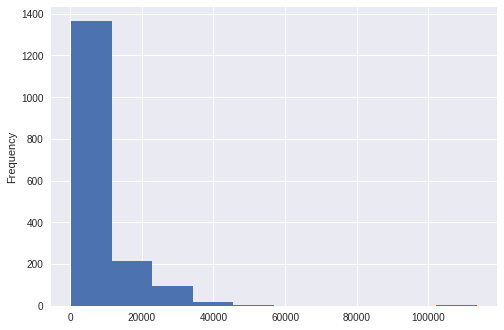

In [0]:
## pandas
gapminder["gdpPercap"].plot.hist()

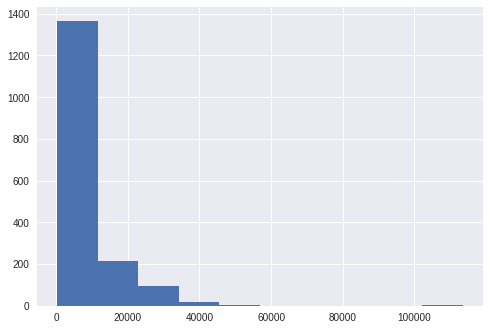

In [0]:
## matplotlib.pyplot
import matplotlib.pyplot as plt

plt.hist(gapminder["gdpPercap"])
plt.show()

In [0]:
import numpy as np

arrA = np.random.normal(size=1000)
arrB = np.random.uniform(size=100)
#plt.hist(arrA)
#plt.show()

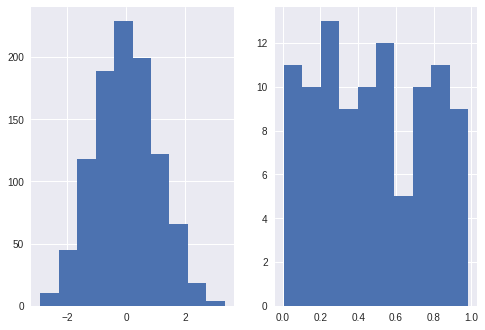

In [0]:
plt.subplot(1,2,1)
plt.hist(arrA)
plt.subplot(1,2,2)
plt.hist(arrB)
plt.show()

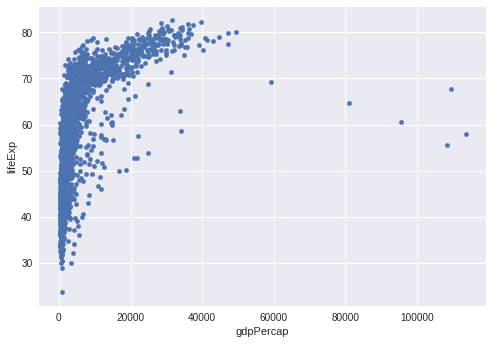

In [0]:
gapminder.plot.scatter(x = 'gdpPercap', y = 'lifeExp')
plt.show()

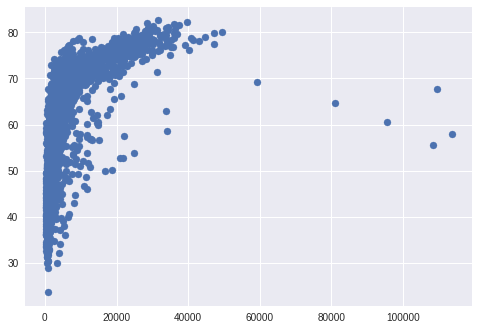

In [0]:
plt.scatter(x = gapminder["gdpPercap"], y = gapminder["lifeExp"])
plt.show()